In [ ]:
!pip install wandb

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [20]:
import tensorflow as tf
from tensorflow.keras.layers import Flatten,Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator


import numpy as np
import cv2
import matplotlib.pyplot as plt

import wandb
from wandb.keras import WandbCallback





In [ ]:
wandb.init(project='Akhond detection')

In [22]:


config=wandb.config
config.learning_rate=0.0001



In [23]:
train_dataset_path='/content/drive/MyDrive/dataset/Sheykh-Recognition'

width=height=224
batch_size=32

idg=ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    zoom_range=0.1,
    shear_range=0.2,
    rotation_range=10,
    validation_split=0.2
)

train_data=idg.flow_from_directory(
    train_dataset_path,
    target_size=(width,height),
    class_mode='categorical',
    batch_size=batch_size,
    subset='training',

)

val_data=idg.flow_from_directory(
    train_dataset_path,
    target_size=(width,height),
    class_mode='categorical',
    batch_size=batch_size,
    subset='validation',
    
)

Found 297 images belonging to 2 classes.
Found 74 images belonging to 2 classes.


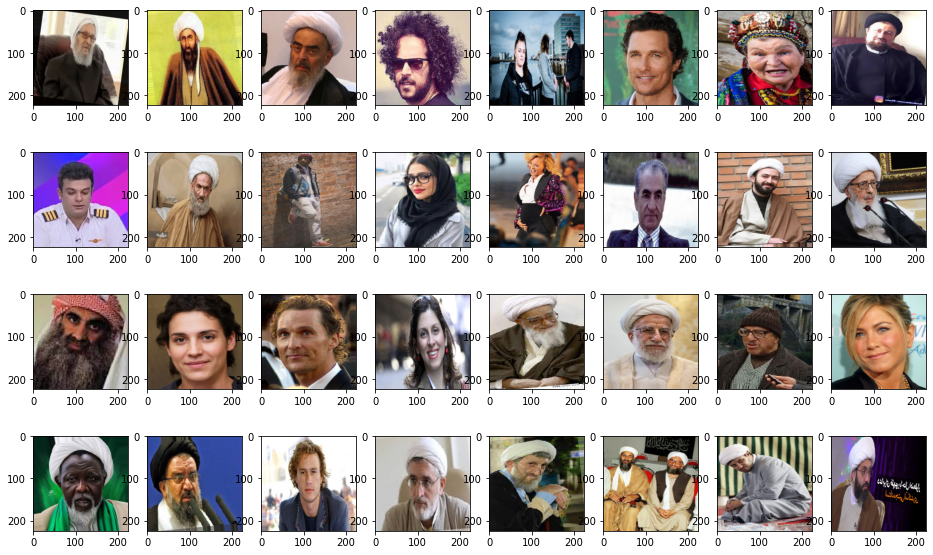

In [24]:
some_images=next(train_data)

X=some_images[0]
Y=some_images[1]

plt.figure(figsize=(16,10))
for i in range(32):
  plt.subplot(4,8,i+1)
  plt.imshow(X[i])

In [25]:
base_model=tf.keras.applications.VGG16(
    include_top=False,
    input_shape=(width,height,3)
)

In [26]:
model=tf.keras.models.Sequential([
      base_model,
      Flatten(),
      Dense(512,activation='relu'),
      Dense(256,activation='relu'),
      Dense(2,activation='softmax')                           
])

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_3 (Dense)             (None, 512)               12845568  
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dense_5 (Dense)             (None, 2)                 514       
                                                                 
Total params: 27,692,098
Trainable params: 27,692,098
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=config.learning_rate),
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

In [29]:
output=model.fit(train_data,validation_data=val_data,epochs=15,callbacks=[WandbCallback()])

Epoch 1/15
10/10 [==============================] - 18s 2s/step - loss: 0.7412 - accuracy: 0.5017 - val_loss: 0.7030 - val_accuracy: 0.5000 - _timestamp: 1647606792.0000 - _runtime: 34.0000
Epoch 2/15
10/10 [==============================] - 15s 1s/step - loss: 0.6959 - accuracy: 0.5084 - val_loss: 0.6823 - val_accuracy: 0.6081 - _timestamp: 1647606808.0000 - _runtime: 50.0000
Epoch 3/15
10/10 [==============================] - 14s 1s/step - loss: 0.6957 - accuracy: 0.5758 - val_loss: 0.6456 - val_accuracy: 0.6351 - _timestamp: 1647606823.0000 - _runtime: 65.0000
Epoch 4/15
10/10 [==============================] - 13s 1s/step - loss: 0.6121 - accuracy: 0.7071 - val_loss: 0.7058 - val_accuracy: 0.6892 - _timestamp: 1647606837.0000 - _runtime: 79.0000
Epoch 5/15
10/10 [==============================] - 15s 1s/step - loss: 0.4751 - accuracy: 0.8047 - val_loss: 0.3786 - val_accuracy: 0.8649 - _timestamp: 1647606851.0000 - _runtime: 93.0000
Epoch 6/15
10/10 [==============================] 

In [30]:
model.save('Akhond_detection.h5')

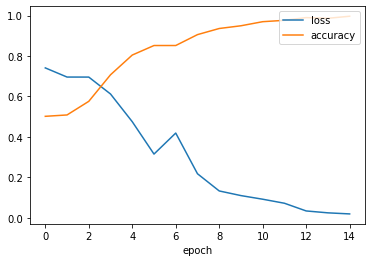

In [33]:


plt.plot(output.history['loss'])
plt.plot(output.history['accuracy'])
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy'], loc='upper right')
plt.show()



In [32]:
model.evaluate(val_data)

3/3 [==============================] - 2s 574ms/step - loss: 0.1281 - accuracy: 0.9730


[0.12806686758995056, 0.9729729890823364]